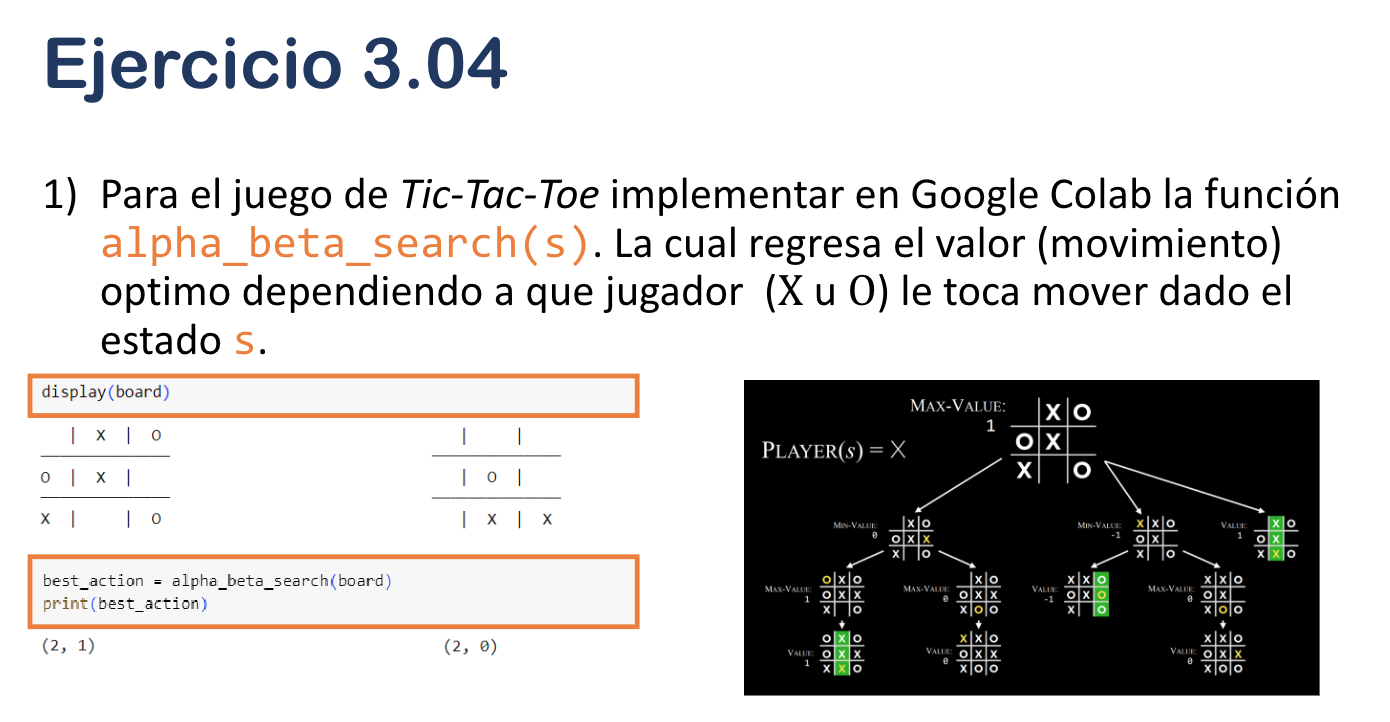

In [2]:
import numpy as np
def __init__():
        symbols = {'0': ' ', 'x': 'x', 'o': 'o'}

def initial_state():
    return np.array([['x', 'o', 'x'], ['o', 'x', '0'], ['0', '0', 'o']])

def print_board(board):
    symbols = [symbols[item] for row in board for item in row]
    print("\n")
    print("\t     |     |")
    print("\t  {}  |  {}  |  {}".format(symbols[0], symbols[1], symbols[2]))
    print('\t_____|_____|_____')
    print("\t     |     |")
    print("\t  {}  |  {}  |  {}".format(symbols[3], symbols[4], symbols[5]))
    print('\t_____|_____|_____')
    print("\t     |     |")
    print("\t  {}  |  {}  |  {}".format(symbols[6], symbols[7], symbols[8]))
    print("\t     |     |")
    print("\n")

def print_tic_tac_toe(values):

    print("\n")
    print("\t     |     |")
    print("\t  {}  |  {}  |  {}".format(values[0], values[1], values[2]))
    print('\t_____|_____|_____')
 
    print("\t     |     |")
    print("\t  {}  |  {}  |  {}".format(values[3], values[4], values[5]))
    print('\t_____|_____|_____')
 
    print("\t     |     |")
 
    print("\t  {}  |  {}  |  {}".format(values[6], values[7], values[8]))
    print("\t     |     |")
    print("\n")

def player_turn(board):
    x_count = np.count_nonzero(board == 'x')
    o_count = np.count_nonzero(board == 'o')
    return 'x' if x_count == o_count else 'o'

def actions(board):
    return list(zip(*np.where(board == '0')))

def result(board, action, player):
    new_board = np.copy(board)
    new_board[action] = player
    return new_board

def checkRows(board):
    for row in board:
        #print("Checking row:", row)  # Debug statement
        if len(set(row)) == 1 and row[0] != '0':
            return row[0]
    return None

def checkDiagonals(board):
    # Main diagonal
    main_diag = [board[i][i] for i in range(len(board))]
    #print("Checking main diagonal:", main_diag)  # Debug statement
    if len(set(main_diag)) == 1 and board[0][0] != '0':
        return board[0][0]

    # Second diagonal
    sec_diag = [board[i][len(board)-i-1] for i in range(len(board))]
    
    if len(set(sec_diag)) == 1 and board[0][len(board)-1] != '0':
        return board[0][len(board)-1]

    return None

def checkWin(board):
    # check original rows if someone has won
    result = checkRows(board)
    if result:
        return result
    
    # check columns as rows of the transposed board
    transposed_board = np.transpose(board)
    
    for row in transposed_board:
        
        if len(set(row)) == 1 and row[0] != '0':
            return row[0]
    
    # Check diagonals
    return checkDiagonals(board)


#If the game is over retrieve True or False
def terminal(board):
    return checkWin(board) is not None or not np.any(board == '0')


def utility(board):
    win = checkWin(board)
    if win == 'x':
        return 1
    elif win == 'o':
        return -1
    else:
        return 0


def max_value(board, action, player, alpha, beta):
    
    if terminal(board):
        return utility(board), None
    
    if player == 'x':
        v = float('-inf')
        best_action = None
        for action in actions(board):
            new_v , _ = max(v, min_value(result(board,action,player)), alpha, beta)
            if new_v > v:
                v = new_v
                best_action = action
            alpha = max(alpha, v)
            
            if alpha >= beta:
                break
            return v , best_action


def min_value(board, action, player, alpha, beta):
    
    if terminal(board):
        return utility(board), None
    
    if player == "o":
        v = float('inf')
        best_action = None
        for action in actions(board):
            new_v, _ = max(v, max_value(result(board,action,player)), alpha, beta)
            if new_v < v:
                v = new_v
                best_action = action
            beta = min(beta, v)

            if beta <= alpha:
                break
            return v, best_action
    return v, best_action


def alpha_beta_search(board, player, alpha, beta):
    if terminal(board):
        return utility(board), None

    if player == 'x':
        value = float('-inf')
        best_move = None
        for action in actions(board):
            new_board = result(board, action, player)
            score, _ = alpha_beta_search(new_board, 'o', alpha, beta)
            if score > value:
                value, best_move = score, action
            alpha = max(alpha, value)
            if alpha >= beta:
                break
        return value, best_move
    else:
        value = float('inf')
        best_move = None
        for action in actions(board):
            new_board = result(board, action, player)
            score, _ = alpha_beta_search(new_board, 'x', alpha, beta)
            if score < value:
                value, best_move = score, action
            beta = min(beta, value)
            if beta <= alpha:
                break
        return value, best_move


def best_move(board, player):
    alpha = float('-inf')
    beta = float('inf')
    return alpha_beta_search(board, player, alpha, beta)[1]  # Now passing alpha and beta

# Example call
test_1 = ["0", "0", "0", "0", "o", "0", "0", "x", "x"]
test_2 = ["0", "x", "o", "o", "x", "0", "x", "0", "o"]
np_game_state = np.array(test_1).reshape((3,3))  # Placeholder for your game board state
print_tic_tac_toe(test_1)
player = player_turn(np_game_state)  # Placeholder function to determine whose turn it is
move = best_move(np_game_state, player)
print(f"Best move for '{player}':", move)

    



	     |     |
	  0  |  0  |  0
	_____|_____|_____
	     |     |
	  0  |  o  |  0
	_____|_____|_____
	     |     |
	  0  |  x  |  x
	     |     |


Best move for 'o': (2, 0)
